In [37]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/AprendizajeAutomaticoUJI/DataSets/master/biopsy.csv")

X = data["ID"]
y = data["V1"]

print(X)
print(y)

0      1000025
1      1002945
2      1015425
3      1016277
4      1017023
        ...   
694     776715
695     841769
696     888820
697     897471
698     897471
Name: ID, Length: 699, dtype: int64
0      5
1      5
2      3
3      6
4      4
      ..
694    3
695    2
696    5
697    4
698    4
Name: V1, Length: 699, dtype: int64


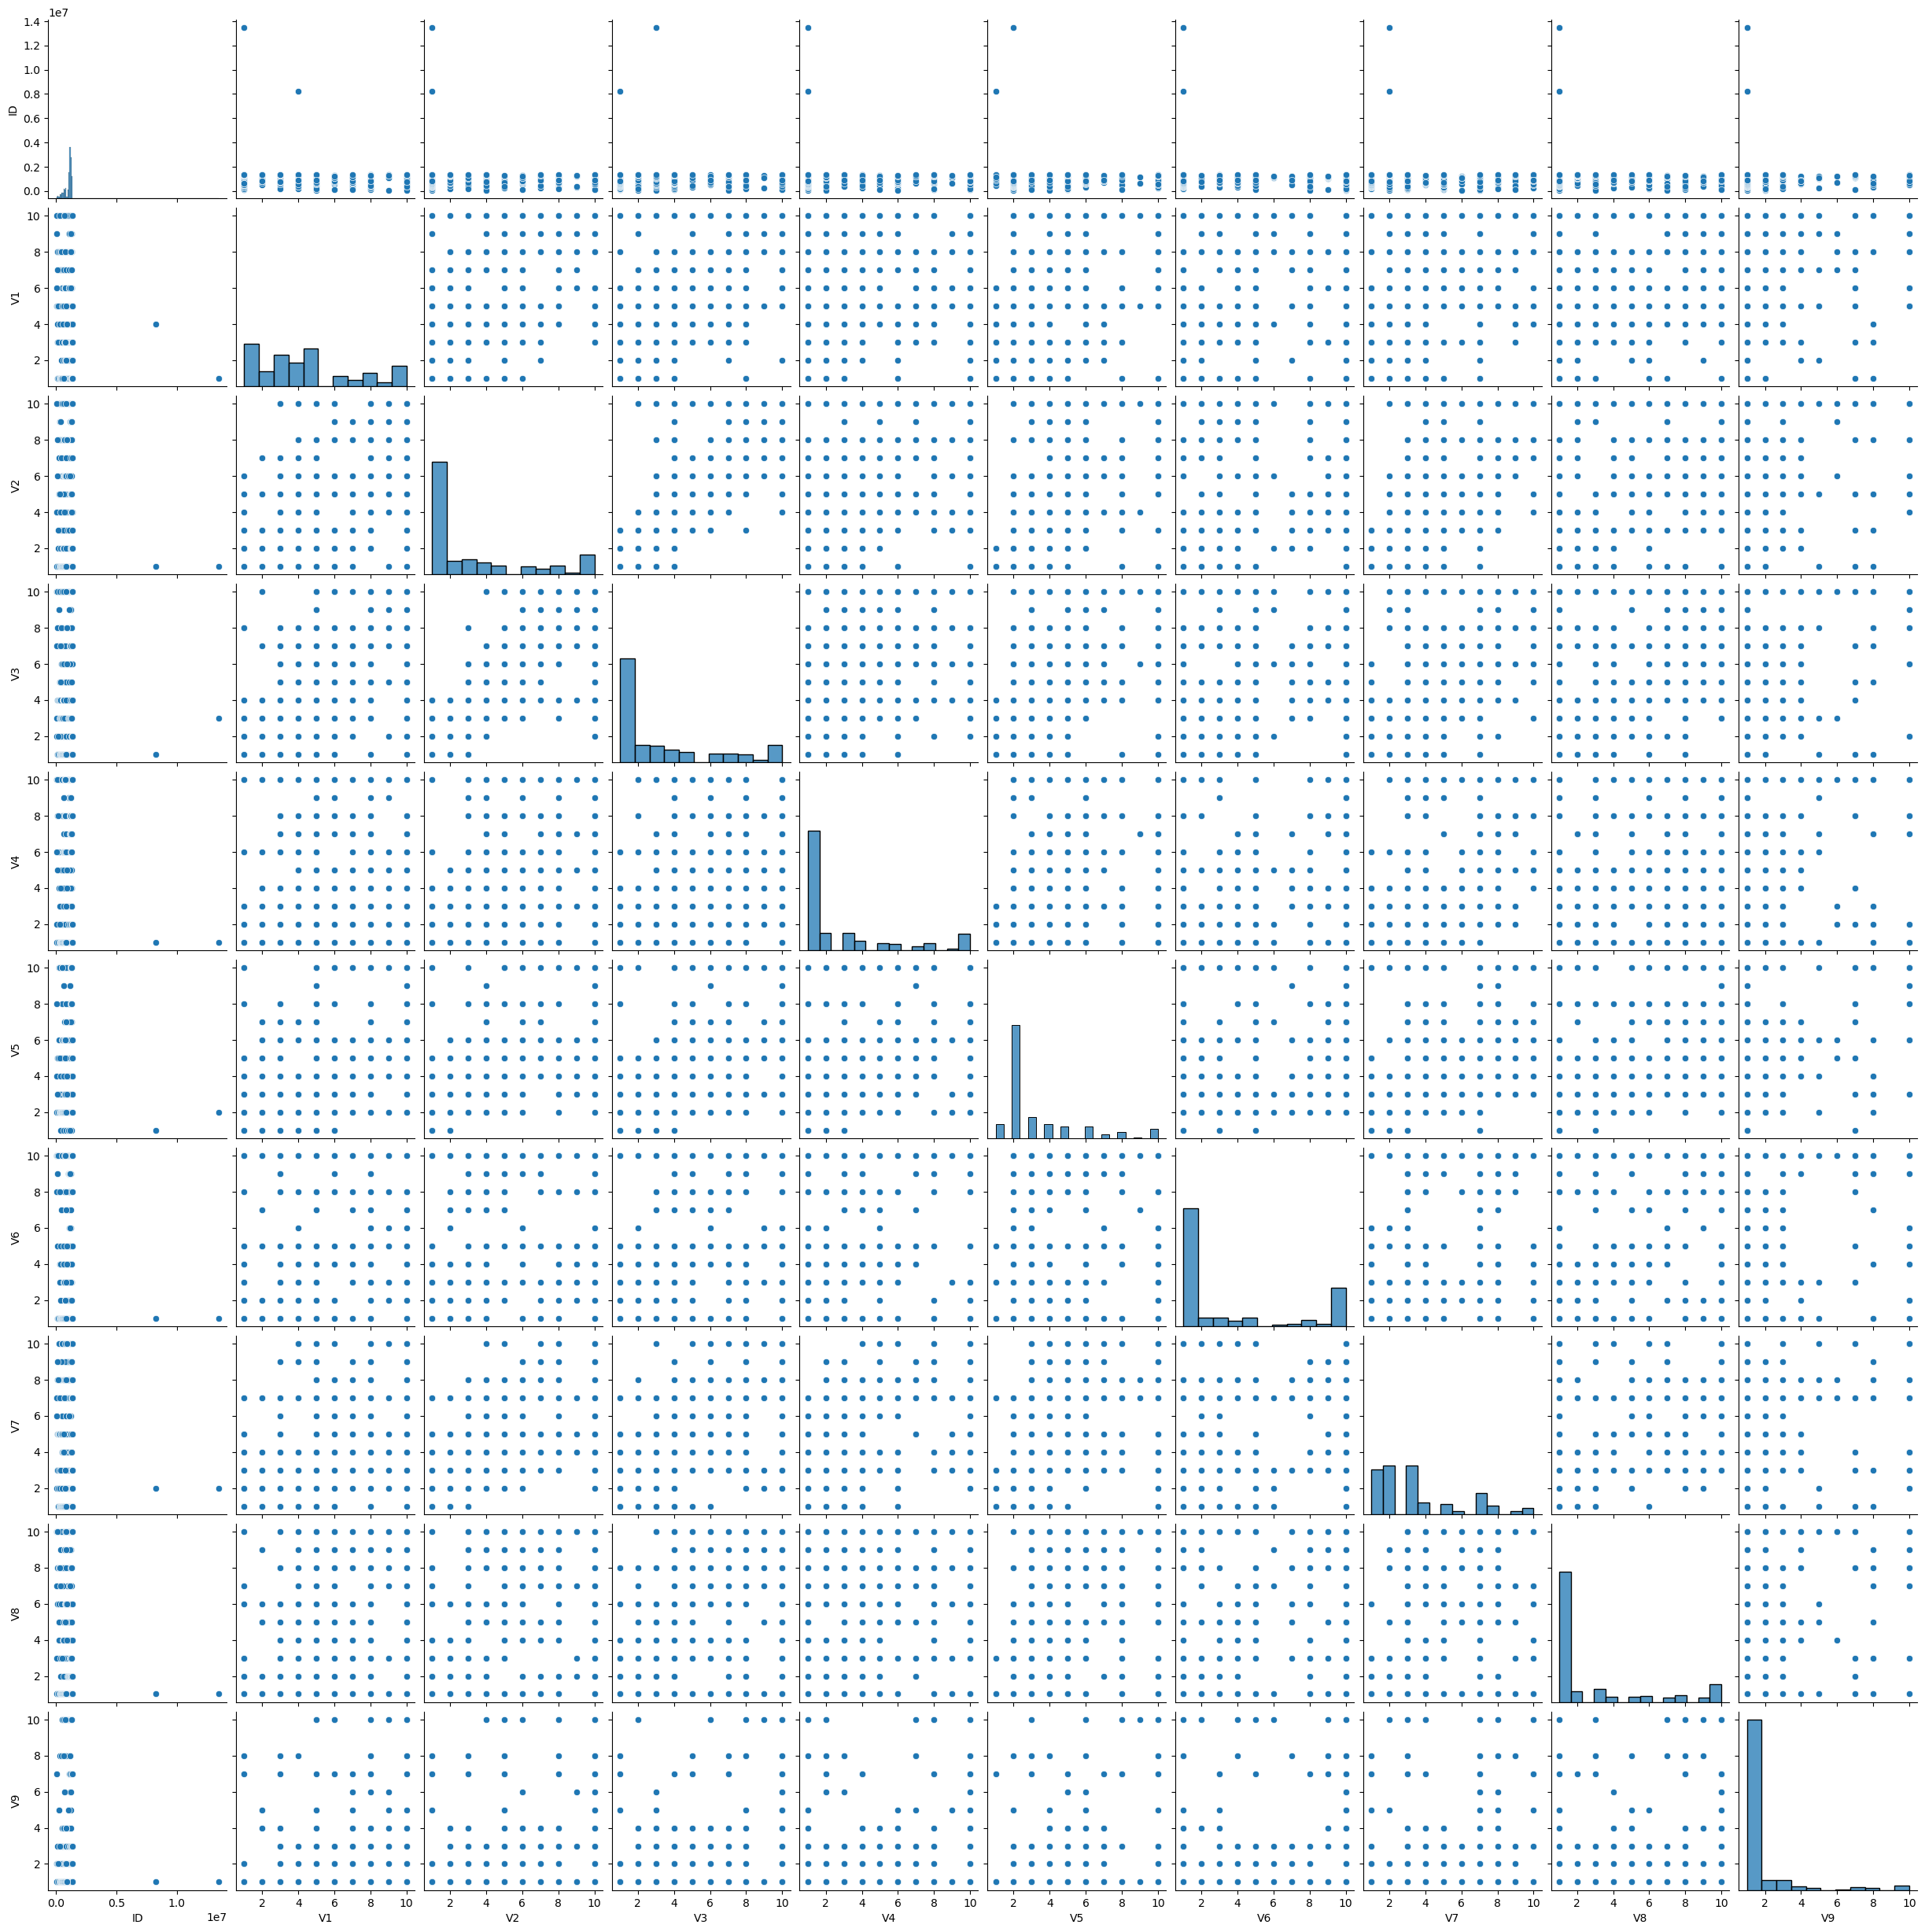

In [38]:
import seaborn as sns

sns.pairplot(data)

Vemos que no tiene sentido que utilicemos el ID para un algoritmo de predicción ya que al ser random no tiene nada que ver con las predicciones.

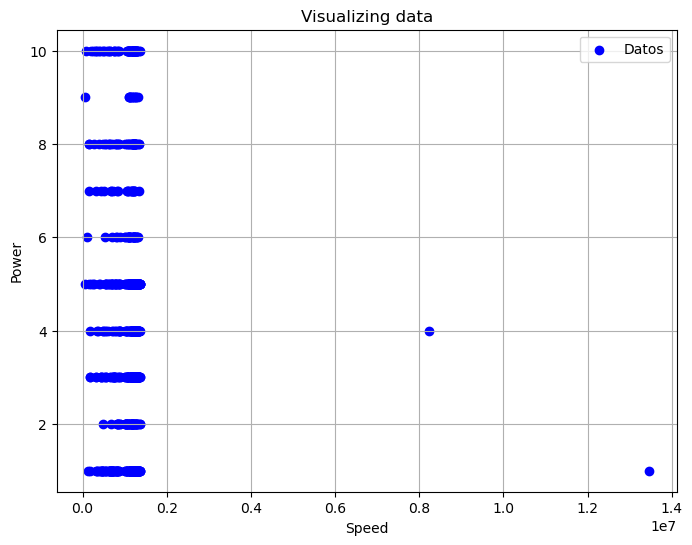

In [39]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
plt.scatter(X, y, color='b', label='Datos')
plt.xlabel("Speed")
plt.ylabel("Power")
plt.title('Visualizing data')
plt.legend()
plt.grid(True)
plt.show()

**4** Elimina los outliers y vuelve a representar los datos

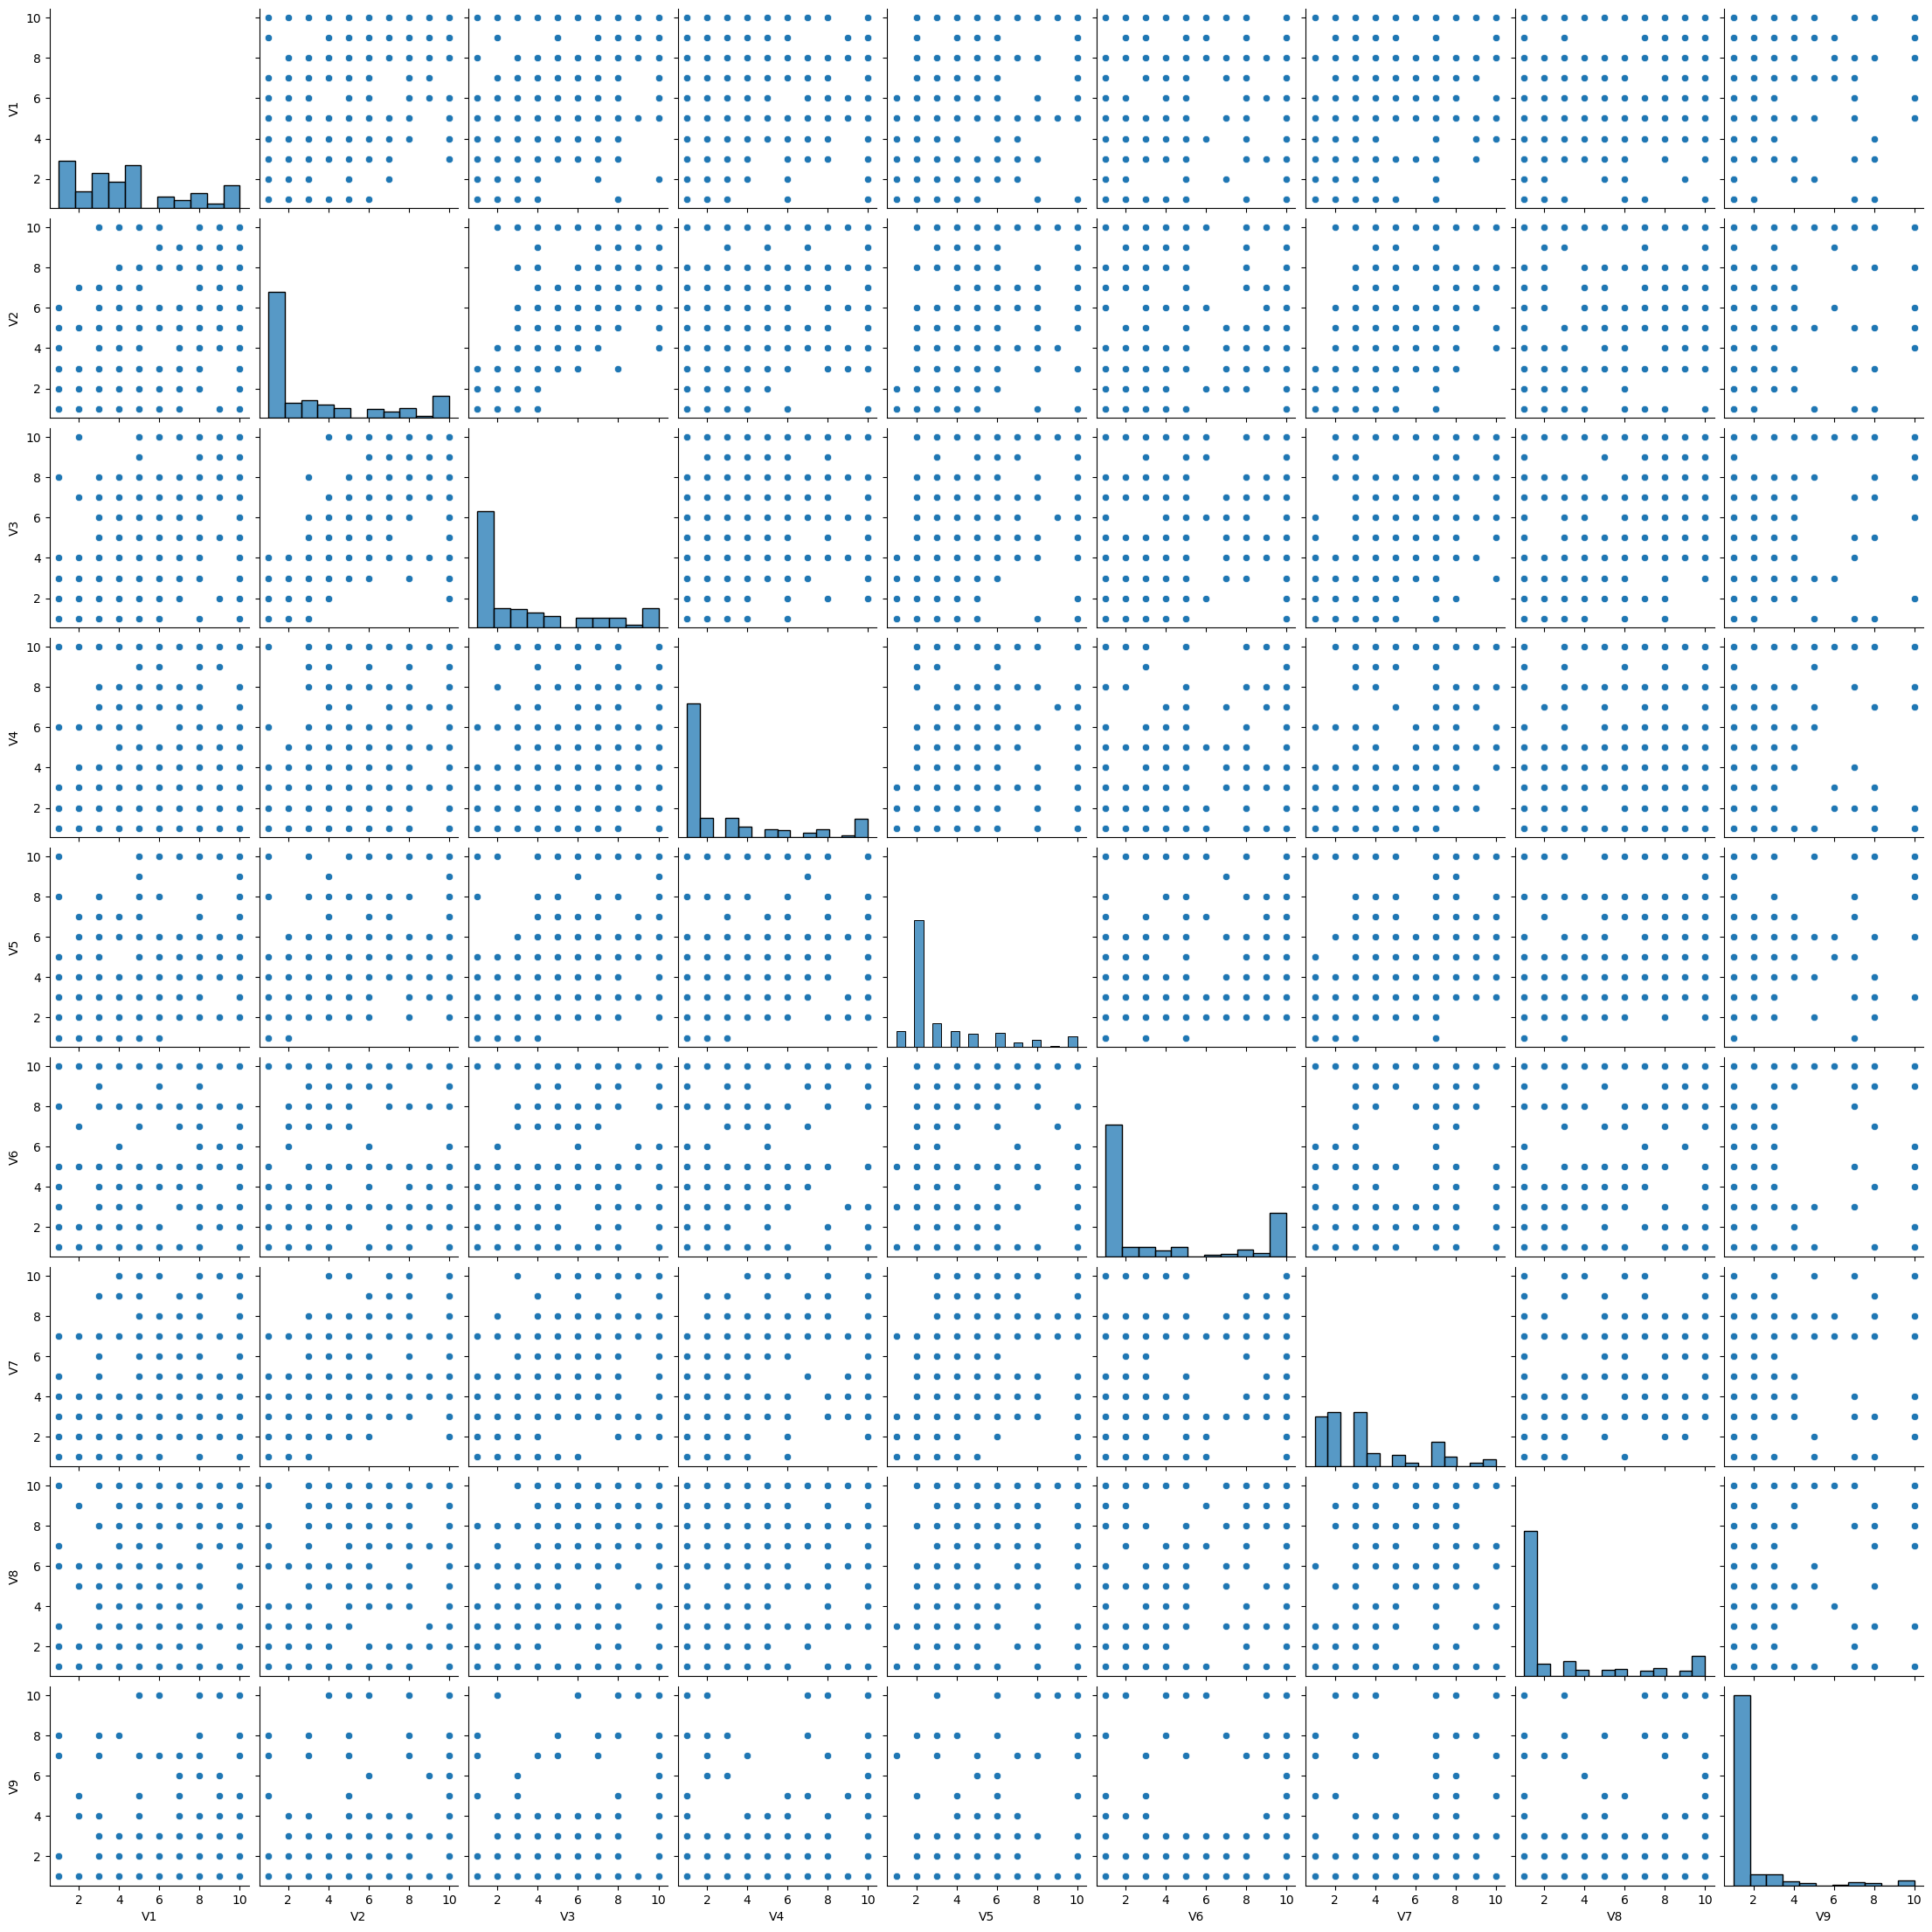

In [40]:
data=data.drop(columns=['ID'])

sns.pairplot(data)

Analizando los datos vemos que hay muchos valores NAN,los vamos a eliminar.

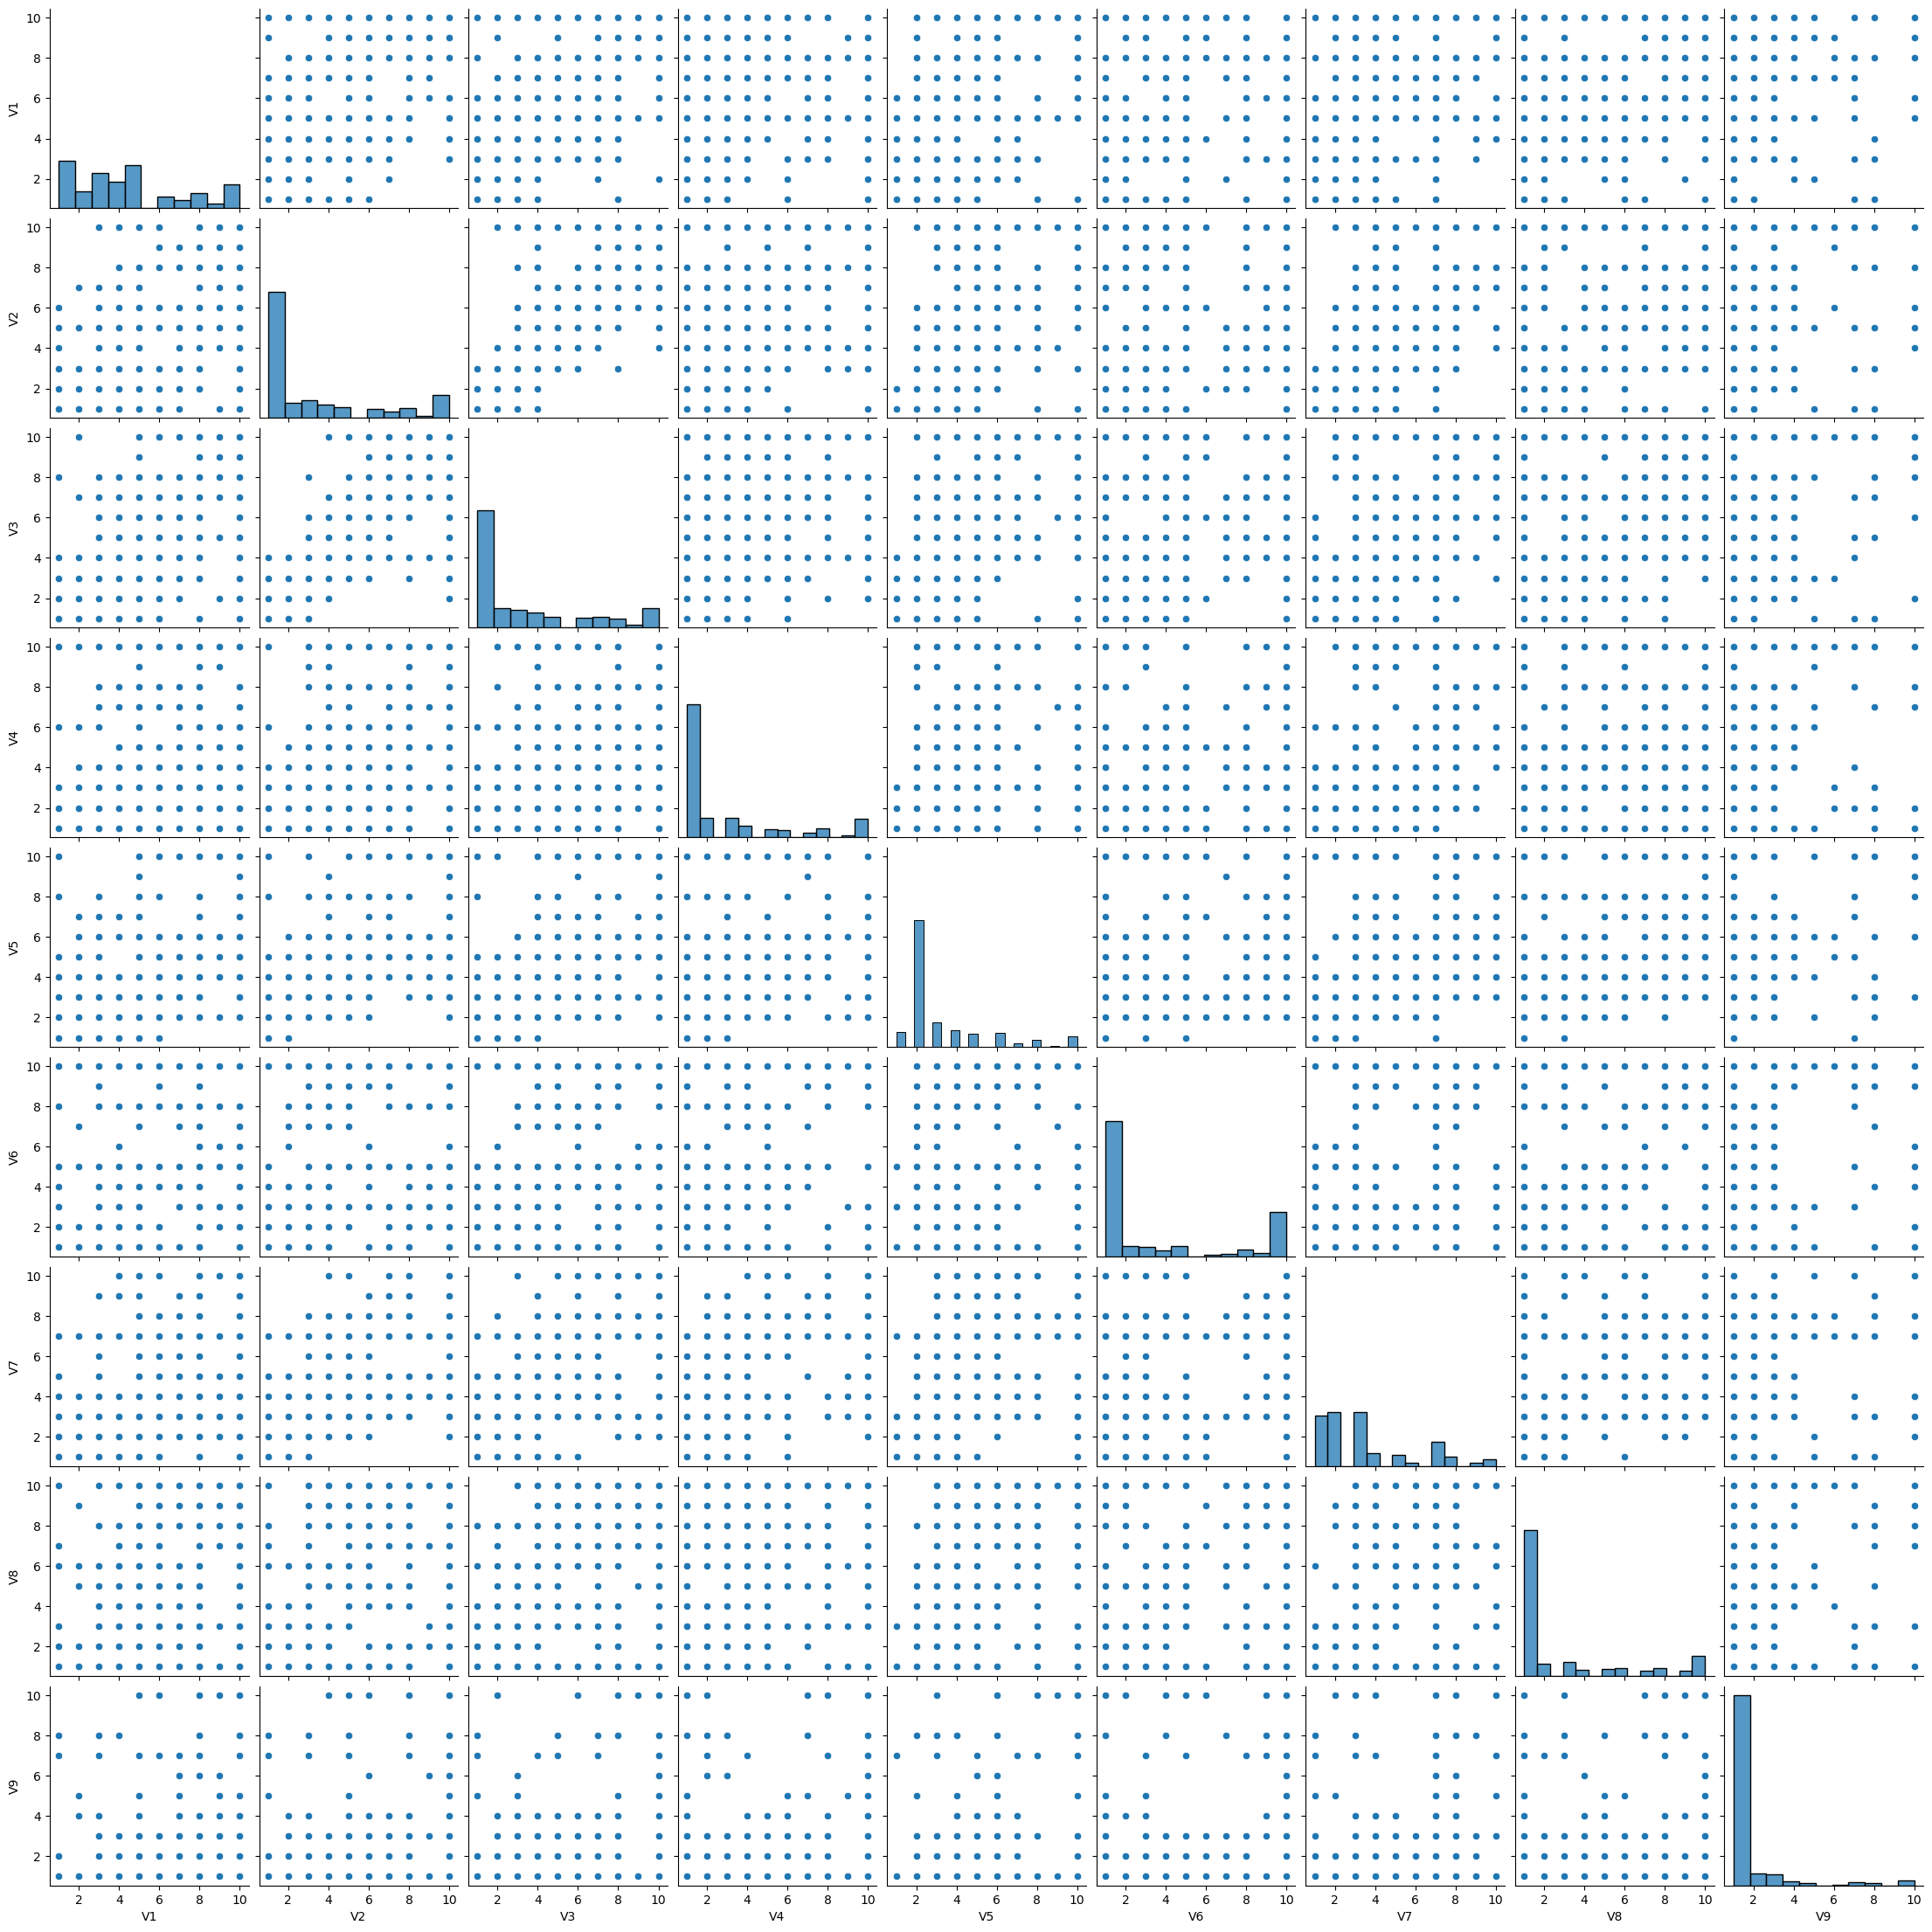

In [41]:
data = data.dropna()
sns.pairplot(data)

Creo una primera version del modelo

In [42]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Codificar las clases: 'benigno' -> 0, 'maligno' -> 1
data["clase"] = encoder.fit_transform(data['clase'])
y = data["clase"]  # Variable objetivo (la columna 'classe')
X = data.drop(columns=["clase"])  # Características (todo menos 'classe')


/tmp/ipykernel_10540/1710813634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["clase"] = encoder.fit_transform(data['clase'])


In [ ]:
#print(X)
#print(y)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


n=100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

mse_results =[]
mae_results =[]
mse_train = []
mae_train = []
r2_results =[]
r2_train = []
error_test =[]
error_train = []
for i in range(n):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=i)



    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Train Predict

    y_predict = model.predict(X_train)
    mse_train.append(mean_squared_error(y_train,  y_predict))
    mae_train.append(mean_absolute_error(y_train, y_predict))
    r2_train.append(r2_score(y_train , y_predict))
    error_train.append(y_train  - (y_predict))
    print(i)
    # Test Predict
    y_predict = model.predict(X_test)
    mse_results.append(mean_squared_error(y_test,  y_predict))
    mae_results.append(mean_absolute_error(y_test, y_predict))
    r2_results.append(r2_score(y_test , y_predict))
    error_test.append(y_test  - (y_predict))
    #mostramos amtriz de confusionpara cada modelo
    conf_matrix = confusion_matrix(y_test, y_predict)
    print("Matriz de confusión:")
    print(conf_matrix)
    #mostramos reporte de calsificacion
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_predict))

# Figure


# Predict on training data
print(f"Mean squared error (Train): {np.mean(mse_train)} ")
print(f"Absolute squared error (Train): {np.mean(mae_train)} ")
print(f"R2 score (Train): {np.mean(r2_train)} ")

# Predict on test data
print(f"Mean squared error (Test): {np.mean(mse_results)} ")
print(f"Absolute squared error (Test): {np.mean(mae_results)} ")
print(f"R2 score (Test): {np.mean(r2_results)} ")

# Obtener los coeficientes del modelo
coefficients = model.coef_[0]

# Mostrar los coeficientes junto con los nombres de las características
for feature, coef in zip(X.columns, coefficients):
    print(f"Característica: {feature}, Coeficiente: {coef:.4f}")



print("--------------------------------------------------")



0
Matriz de confusión:
[[84  3]
 [ 3 47]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        87
           1       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137

1
Matriz de confusión:
[[90  0]
 [ 2 45]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        90
           1       1.00      0.96      0.98        47

    accuracy                           0.99       137
   macro avg       0.99      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137

2
Matriz de confusión:
[[79  4]
 [ 2 52]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        83
           1       0.93      0.96

Obtengo los coeficientes del modelo para ver como influyen las diferentes caracteísticas en la predicción del ultimo modelo creado por ejemplo

Exlorando este primer modelo vemos que los mayores coeficientes ordenados de mayor a menor son:V7,V1 y V6(muy igualado con V4 Y V9)

Con la información que has conseguido del análisis realizado, crea un primera versión de un regresor logístico que utilice una única característica. ¿Qué característica vas a utilizar? ¿Por qué has elegido esa característica?

Voy a crear un modelo con la única caractrística V7 ya que es la que mayor coeficiente tiene y por tanto es la que más interviene en la predicción.

In [48]:
y = data["clase"]  # Variable objetivo (la columna 'classe')
#usamos dos corchetes para indicar que X es un Dataframe y no un vector
#  unidimensional Serie,ya que sino da error en el metodo fit
X = data[["V7"]]  # Característica V7 soolo
#print(y)
#print(X)

n=100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

mse_results =[]
mae_results =[]
mse_train = []
mae_train = []
r2_results =[]
r2_train = []
error_test =[]
error_train = []
for i in range(n):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=i)



    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Train Predict

    y_predict = model.predict(X_train)
    mse_train.append(mean_squared_error(y_train,  y_predict))
    mae_train.append(mean_absolute_error(y_train, y_predict))
    r2_train.append(r2_score(y_train , y_predict))
    error_train.append(y_train  - (y_predict))
    #print(i)
    # Test Predict
    y_predict = model.predict(X_test)
    mse_results.append(mean_squared_error(y_test,  y_predict))
    mae_results.append(mean_absolute_error(y_test, y_predict))
    r2_results.append(r2_score(y_test , y_predict))
    error_test.append(y_test  - (y_predict))
    #mostramos amtriz de confusionpara cada modelo
    conf_matrix = confusion_matrix(y_test, y_predict)
    print("Matriz de confusión:")
    print(conf_matrix)
    #mostramos reporte de calsificacion
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_predict))

# Figure


# Predict on training data
print(f"Mean squared error (Train): {np.mean(mse_train)} ")
print(f"Absolute squared error (Train): {np.mean(mae_train)} ")
print(f"R2 score (Train): {np.mean(r2_train)} ")

# Predict on test data
print(f"Mean squared error (Test): {np.mean(mse_results)} ")
print(f"Absolute squared error (Test): {np.mean(mae_results)} ")
print(f"R2 score (Test): {np.mean(r2_results)} ")

# Obtener los coeficientes del modelo
coefficients = model.coef_[0]

# Mostrar los coeficientes junto con los nombres de las características
for feature, coef in zip(X.columns, coefficients):
    print(f"Característica: {feature}, Coeficiente: {coef:.4f}")



print("--------------------------------------------------")

Matriz de confusión:
[[82  5]
 [ 7 43]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        87
           1       0.90      0.86      0.88        50

    accuracy                           0.91       137
   macro avg       0.91      0.90      0.90       137
weighted avg       0.91      0.91      0.91       137

Matriz de confusión:
[[89  1]
 [ 9 38]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        90
           1       0.97      0.81      0.88        47

    accuracy                           0.93       137
   macro avg       0.94      0.90      0.92       137
weighted avg       0.93      0.93      0.93       137

Matriz de confusión:
[[78  5]
 [11 43]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        83
           1       0.90      0.80      

Obtenemos un R2 score de 0.59,muy inferior al anterior de 0.82(con todas las características)

Amplia el número de características a dos. ¿Cuál es la segunda característica que has seleccionado? ¿Por qué la has seleccionado? ¿Han mejorado los resultados? ¿Cuanto han mejorado?

La segunda en orden de influencia es V1 por tanto las 2 caracterísitcas que voy a usar son : V1 y V7

In [49]:

y = data["clase"]  # Variable objetivo (la columna 'classe')
#usamos dos corchetes para indicar que X es un Dataframe y no un vector
#  unidimensional Serie,ya que sino da error en el metodo fit
X = data[["V7","V1"]]  # Característica V7 soolo
print(y)
print(X)

n=100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

mse_results =[]
mae_results =[]
mse_train = []
mae_train = []
r2_results =[]
r2_train = []
error_test =[]
error_train = []
for i in range(n):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=i)



    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Train Predict

    y_predict = model.predict(X_train)
    mse_train.append(mean_squared_error(y_train,  y_predict))
    mae_train.append(mean_absolute_error(y_train, y_predict))
    r2_train.append(r2_score(y_train , y_predict))
    error_train.append(y_train  - (y_predict))
    print(i)
    # Test Predict
    y_predict = model.predict(X_test)
    mse_results.append(mean_squared_error(y_test,  y_predict))
    mae_results.append(mean_absolute_error(y_test, y_predict))
    r2_results.append(r2_score(y_test , y_predict))
    error_test.append(y_test  - (y_predict))
    #mostramos amtriz de confusionpara cada modelo
    conf_matrix = confusion_matrix(y_test, y_predict)
    print("Matriz de confusión:")
    print(conf_matrix)
    #mostramos reporte de calsificacion
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_predict))

# Figure


# Predict on training data
print(f"Mean squared error (Train): {np.mean(mse_train)} ")
print(f"Absolute squared error (Train): {np.mean(mae_train)} ")
print(f"R2 score (Train): {np.mean(r2_train)} ")

# Predict on test data
print(f"Mean squared error (Test): {np.mean(mse_results)} ")
print(f"Absolute squared error (Test): {np.mean(mae_results)} ")
print(f"R2 score (Test): {np.mean(r2_results)} ")

# Obtener los coeficientes del modelo
coefficients = model.coef_[0]

# Mostrar los coeficientes junto con los nombres de las características
for feature, coef in zip(X.columns, coefficients):
    print(f"Característica: {feature}, Coeficiente: {coef:.4f}")



print("--------------------------------------------------")


0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: clase, Length: 683, dtype: int64
     V7  V1
0     3   5
1     3   5
2     3   3
3     3   6
4     3   4
..   ..  ..
694   1   3
695   1   2
696   8   5
697  10   4
698  10   4

[683 rows x 2 columns]
0
Matriz de confusión:
[[86  1]
 [ 4 46]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        87
           1       0.98      0.92      0.95        50

    accuracy                           0.96       137
   macro avg       0.97      0.95      0.96       137
weighted avg       0.96      0.96      0.96       137

1
Matriz de confusión:
[[89  1]
 [ 4 43]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        90
           1       0.98      0.91      0.95        47

    accuracy                           0.96       137
   macro avg 

Nuestro modelo ha mejorado respecto al anterior pero sigue siendo ligeramente inferior al primer modelo que usaba todas las características.

Siguen ampliando el número de características justificando el orden de inclusión. ¿Cómo mejoran los resultados al ir añadiendo nuevas características?

Las siguientes 3 características que voy a añadir a la lista de características van a ser V6 ,V4 Y V9 ya eran las 3 características que empataban(prácticamente) en el tercer puesto de características con más influencia en la predición del modelo con todas las características.




In [50]:

y = data["clase"]  # Variable objetivo (la columna 'classe')
#usamos dos corchetes para indicar que X es un Dataframe y no un vector
#  unidimensional Serie,ya que sino da error en el metodo fit
X = data[["V7","V1","V6","V4","V9"]]  # Característica V7 soolo
print(y)
print(X)

n=100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

mse_results =[]
mae_results =[]
mse_train = []
mae_train = []
r2_results =[]
r2_train = []
error_test =[]
error_train = []
for i in range(n):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=i)



    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Train Predict

    y_predict = model.predict(X_train)
    mse_train.append(mean_squared_error(y_train,  y_predict))
    mae_train.append(mean_absolute_error(y_train, y_predict))
    r2_train.append(r2_score(y_train , y_predict))
    error_train.append(y_train  - (y_predict))
    print(i)
    # Test Predict
    y_predict = model.predict(X_test)
    mse_results.append(mean_squared_error(y_test,  y_predict))
    mae_results.append(mean_absolute_error(y_test, y_predict))
    r2_results.append(r2_score(y_test , y_predict))
    error_test.append(y_test  - (y_predict))
    #mostramos amtriz de confusionpara cada modelo
    conf_matrix = confusion_matrix(y_test, y_predict)
    print("Matriz de confusión:")
    print(conf_matrix)
    #mostramos reporte de calsificacion
    print("Reporte de clasificación:")
    print(classification_report(y_test, y_predict))

# Figure


# Predict on training data
print(f"Mean squared error (Train): {np.mean(mse_train)} ")
print(f"Absolute squared error (Train): {np.mean(mae_train)} ")
print(f"R2 score (Train): {np.mean(r2_train)} ")

# Predict on test data
print(f"Mean squared error (Test): {np.mean(mse_results)} ")
print(f"Absolute squared error (Test): {np.mean(mae_results)} ")
print(f"R2 score (Test): {np.mean(r2_results)} ")

# Obtener los coeficientes del modelo
coefficients = model.coef_[0]

# Mostrar los coeficientes junto con los nombres de las características
for feature, coef in zip(X.columns, coefficients):
    print(f"Característica: {feature}, Coeficiente: {coef:.4f}")



print("--------------------------------------------------")


0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: clase, Length: 683, dtype: int64
     V7  V1    V6  V4  V9
0     3   5   1.0   1   1
1     3   5  10.0   5   1
2     3   3   2.0   1   1
3     3   6   4.0   1   1
4     3   4   1.0   3   1
..   ..  ..   ...  ..  ..
694   1   3   2.0   1   1
695   1   2   1.0   1   1
696   8   5   3.0   3   2
697  10   4   4.0   4   1
698  10   4   5.0   5   1

[683 rows x 5 columns]
0
Matriz de confusión:
[[85  2]
 [ 3 47]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        87
           1       0.96      0.94      0.95        50

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

1
Matriz de confusión:
[[90  0]
 [ 2 45]]
Reporte de clasificación:
              precision    recall  f1-score   support

        

Utilizando las características V7,V1,V6,V4 Y V9 obtenemos un r2score de 0.843,es decir un mejor rendimiento que el modelo que utilizaba todas las características